In [7]:
%matplotlib inline
import pickle as pkl
import numpy as np
import spectral
import pandas as pd
import scipy.io as io
import os

Load the ground truth image
===========================

In [8]:
DATA_PATH = os.path.join(os.getcwd(),"Data")
output_image = io.loadmat(os.path.join(DATA_PATH, 'Indian_pines_gt.mat'))['indian_pines_gt']

Analyze the target image
=======================

In [9]:
height = output_image.shape[0]
width = output_image.shape[1]
targets = []
for j in range(height):
    for i in range(width):
        if output_image[j][i]==0 :
            continue
        else :
            targets.append(output_image[j][i])

In [10]:
unq, unq_idx = np.unique(targets, return_inverse=True)
unq_cnt = np.bincount(unq_idx)
count_mat = []
for i in range(len(unq_cnt)):
    count_mat.append(unq_cnt[i])
print "Polulation of target pixels of different classes: ", count_mat

Polulation of target pixels of different classes:  [46, 1428, 830, 237, 483, 730, 28, 478, 20, 972, 2455, 593, 205, 1265, 386, 93]


In [11]:
validation_scores = {'5x5': 86.19, '11x11':85.19, '21x21':97.31, '31x31':98.19, '37x37':99.56}
CLASSES = 16

In [15]:
total = sum(validation_scores.values())
credibility = {}
for keys,value in validation_scores.items():
    credibility[keys]=value/total 

In [16]:
f = open('Predictions.pkl','rb')
output_predictions = {}
for i in range(5):
    for keys, values in (pkl.load(f).iteritems()):
        score = validation_scores[keys]
        for a in range(len(values)):
            for b in range(len(values)):
                if isinstance(values[a][b],int):
                    values[a][b] = np.zeros((16))       
        output_predictions[keys] = np.asarray(values)*credibility[keys]


In [17]:
final_matrix = sum(output_predictions.values())

In [25]:
predictions=[]
cnf_mat =[[0 for x in range(CLASSES)] for  y in range(CLASSES)]
for i in range(len(final_matrix)):
    temp=[]
    for j in range(len(final_matrix[i])):
        if np.count_nonzero(final_matrix[i][j]) == 0 :
            temp.append(0)
        else:
            tmp = np.argmax(final_matrix[i][j])
            temp.append(tmp+1)
            if tmp == output_image[i][j]-1:
                cnf_mat[tmp][tmp] = cnf_mat[tmp][tmp] + 1
            else :
                cnf_mat[tmp][output_image[i][j]-1] = cnf_mat[tmp][output_image[i][j]-1] + 1
    predictions.append(temp)
for i in range(CLASSES):
    for j in range(CLASSES):
        cnf_mat[i][j] = 100*(float(cnf_mat[i][j])/count_mat[j])

df = pd.DataFrame(cnf_mat) 
print df  
predictions = np.array(predictions)

     0          1          2    3          4          5    6          7    8   \
0   100   0.000000   0.000000    0   0.000000   0.000000    0   0.627615    0   
1     0  93.137255   1.807229    0   0.000000   0.000000    0   0.000000    0   
2     0   0.630252  83.132530    0   0.000000   0.000000    0   0.000000    0   
3     0   0.000000   0.240964  100   0.000000   0.410959    0   0.000000    0   
4     0   0.070028   0.000000    0  95.031056   0.000000    0   0.209205    0   
5     0   0.000000   0.120482    0   0.207039  99.589041    0   0.000000    0   
6     0   0.000000   0.000000    0   0.000000   0.000000  100   0.000000    0   
7     0   0.000000   0.000000    0   0.000000   0.000000    0  99.163180    0   
8     0   0.000000   0.000000    0   0.000000   0.000000    0   0.000000  100   
9     0   2.380952   0.843373    0   0.000000   0.000000    0   0.000000    0   
10    0   1.610644   0.361446    0   0.000000   0.000000    0   0.000000    0   
11    0   2.100840   7.10843

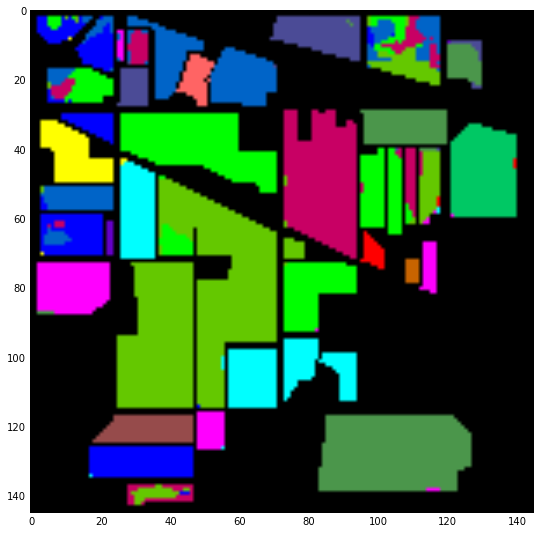

In [26]:
show = spectral.imshow(classes = predictions , figsize=(9,9))